### Explication des jointures

1. Chargement des données

In [1]:
import pandas as pd

# URLs des fichiers CSV
url_customers = "https://github.com/MicrosoftLearning/dp-data/blob/main/customers.csv?raw=true"
url_orders = "https://github.com/MicrosoftLearning/dp-data/blob/main/orders.csv?raw=true"
url_products = "https://github.com/MicrosoftLearning/dp-data/blob/main/products.csv?raw=true"


# Chargement
customers = pd.read_csv(url_customers)
orders = pd.read_csv(url_orders)
products = pd.read_csv(url_products)


In [2]:
customers.head()

,CustomerID,FirstName,LastName,EmailAddress
0,1,Orlando,Gee,orlando0@adventure-works.com
1,2,Keith,Harris,keith0@adventure-works.com
2,3,Donna,Carreras,donna0@adventure-works.com
3,4,Janet,Gates,janet1@adventure-works.com
4,5,Lucy,Harrington,lucy0@adventure-works.com


In [3]:
orders.head()

,SalesOrderID,OrderDate,CustomerID,LineItem,ProductID,OrderQty,LineItemTotal
0,71774,2022-06-01,29847,1,836,1,356.90
1,71774,2022-06-01,29847,2,822,1,356.90
2,71776,2022-06-01,30072,1,907,1,63.90
3,71780,2022-06-01,30113,1,905,4,873.82
4,71780,2022-06-01,30113,2,983,2,923.39


In [4]:
products.head()

,ProductID,ProductName,Category,ListPrice
0,771,"Mountain-100 Silver, 38",Mountain Bikes,3399.99
1,772,"Mountain-100 Silver, 42",Mountain Bikes,3399.99
2,773,"Mountain-100 Silver, 44",Mountain Bikes,3399.99
3,774,"Mountain-100 Silver, 48",Mountain Bikes,3399.99
4,775,"Mountain-100 Black, 38",Mountain Bikes,3374.99


In [5]:
# Fusion des données
orders_with_customers = orders.merge(customers, on="CustomerID")
orders_with_customers.head()


,SalesOrderID,OrderDate,CustomerID,LineItem,ProductID,OrderQty,LineItemTotal,FirstName,LastName,EmailAddress
0,71774,2022-06-01,29847,1,836,1,356.90,David,Hodgson,david16@adventure-works.com
1,71774,2022-06-01,29847,2,822,1,356.90,David,Hodgson,david16@adventure-works.com
2,71776,2022-06-01,30072,1,907,1,63.90,Andrea,Thomsen,andrea1@adventure-works.com
3,71780,2022-06-01,30113,1,905,4,873.82,Raja,Venugopal,raja0@adventure-works.com
4,71780,2022-06-01,30113,2,983,2,923.39,Raja,Venugopal,raja0@adventure-works.com


In [6]:
orders_with_customers_with_products = orders_with_customers.merge(products, on="ProductID")
orders_with_customers_with_products.head()

,SalesOrderID,OrderDate,CustomerID,LineItem,ProductID,OrderQty,LineItemTotal,FirstName,LastName,EmailAddress,ProductName,Category,ListPrice
0,71774,2022-06-01,29847,1,836,1,356.90,David,Hodgson,david16@adventure-works.com,"ML Road Frame-W - Yellow, 48",Road Frames,594.83
1,71774,2022-06-01,29847,2,822,1,356.90,David,Hodgson,david16@adventure-works.com,"ML Road Frame-W - Yellow, 38",Road Frames,594.83
2,71776,2022-06-01,30072,1,907,1,63.90,Andrea,Thomsen,andrea1@adventure-works.com,Rear Brakes,Brakes,106.50
3,71780,2022-06-01,30113,1,905,4,873.82,Raja,Venugopal,raja0@adventure-works.com,"ML Mountain Frame-W - Silver, 42",Mountain Frames,364.09
4,71780,2022-06-01,30113,2,983,2,923.39,Raja,Venugopal,raja0@adventure-works.com,"Mountain-400-W Silver, 46",Mountain Bikes,769.49


Les façons de joindre avec merge

![image des jointure](https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png?ezimgfmt=rs:535x145/rscb1/ng:webp/ngcb1)

Top catégories par chiffre d’affaires : 
    
     - Montre quelles catégories génèrent le plus de ventes.

<Axes: title={'center': 'Total des ventes par catégorie de produit'}, xlabel='Category'>

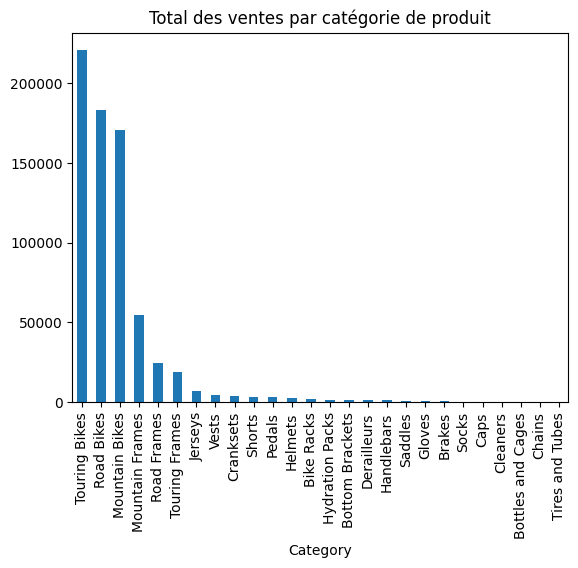

In [7]:
orders_with_customers_with_products.groupby("Category")["LineItemTotal"].sum().sort_values(ascending=False).plot(kind="bar", title="Total des ventes par catégorie de produit")

Top clients par montant total commandé

    Identifie les meilleurs clients.

<Axes: title={'center': 'Total des ventes par client'}, xlabel='FirstName,LastName'>

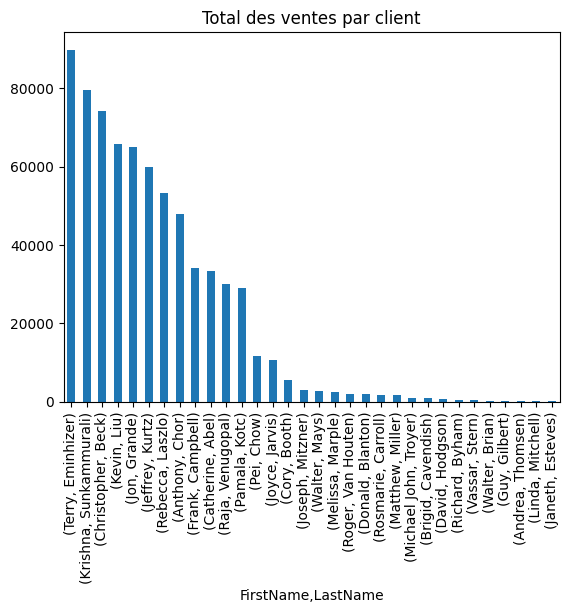

In [8]:
orders_with_customers_with_products.groupby(["FirstName", "LastName"])["LineItemTotal"].sum().sort_values(ascending=False).plot(kind="bar", title="Total des ventes par client")

Évolution des ventes dans le temps
Visualise le chiffre d’affaires jour par jour

<Axes: xlabel='OrderDate'>

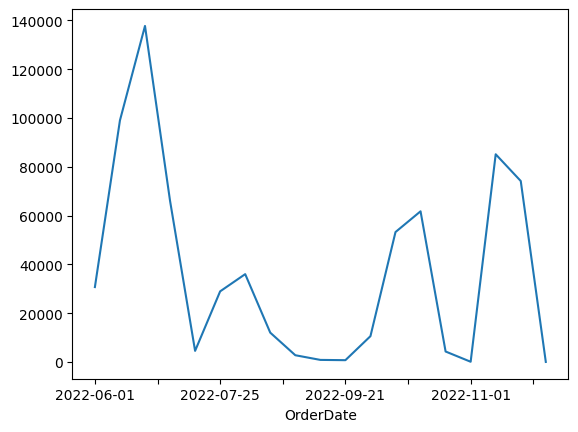

In [9]:
orders_with_customers_with_products.groupby("OrderDate")["LineItemTotal"].sum().plot()


### Avec join() — jointure sur les index uniquement

In [10]:
df_customers_indexed = customers.set_index("CustomerID")
df_orders_indexed = orders.set_index("CustomerID")

In [11]:
joined = df_orders_indexed.join(df_customers_indexed, how="inner")
joined

,SalesOrderID,OrderDate,LineItem,ProductID,OrderQty,LineItemTotal,FirstName,LastName,EmailAddress
CustomerID,,,,,,,,,
29847,71774,2022-06-01,1,836,1,356.90,David,Hodgson,david16@adventure-works.com
29847,71774,2022-06-01,2,822,1,356.90,David,Hodgson,david16@adventure-works.com
30072,71776,2022-06-01,1,907,1,63.90,Andrea,Thomsen,andrea1@adventure-works.com
30113,71780,2022-06-01,1,905,4,873.82,Raja,Venugopal,raja0@adventure-works.com
30113,71780,2022-06-01,2,983,2,923.39,Raja,Venugopal,raja0@adventure-works.com
...,...,...,...,...,...,...,...,...,...
29546,71938,2022-11-21,39,715,3,89.98,Christopher,Beck,christopher1@adventure-works.com
29546,71938,2022-11-21,40,881,1,32.39,Christopher,Beck,christopher1@adventure-works.com
29546,71938,2022-11-21,41,875,2,10.79,Christopher,Beck,christopher1@adventure-works.com
